# SEPSIS PREDICTION (A CLASSIFICATION PROJECT)

## Data understanding

The project is about how to determine wether patients are likely to get sepsis.

According to the Mayo Clinic "Sepsis is a serious condition in which the body responds improperly to an infection. The infection-fighting processes turn on the body, causing the organs to work poorly.

Sepsis may progress to septic shock. This is a dramatic drop in blood pressure that can damage the lungs, kidneys, liver and other organs. When the damage is severe, it can lead to death.

Early treatment of sepsis improves chances for survival."

In this dataset we have been provided with some features/Key indicator that could lead to sepsis in patients, we will be using this information to train machine learning models to determine which of the conditions could lead to sepsis.

### Full meaning of columns
- ID: number to represent patient ID
- PRG: Plasma glucose
- PL: Blood Work Result-1 (mu U/ml)
- PR: Blood Pressure (mm Hg)
- SK: Blood Work Result-2 (mm)
- TS: Blood Work Result-3 (mu U/ml)
- M11: Body mass index (weight in kg/(height in m)^2
- BD2: Blood Work Result-4 (mu U/ml)
- Age: patients age (years)
- Insurance: If a patient holds a valid insurance card
- Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: means otherwise.

### Null Hypothesis
- Age does not affect the chances of developing sepsis

### Alternate hypothesis
- Age is a significant factor in developing sepsis

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from scipy.stats import chi2_contingency

from warnings import filterwarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
df = pd.read_csv('.\data\Patients_Files_Train.csv')

test_df = pd.read_csv('.\data\Patients_Files_Train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


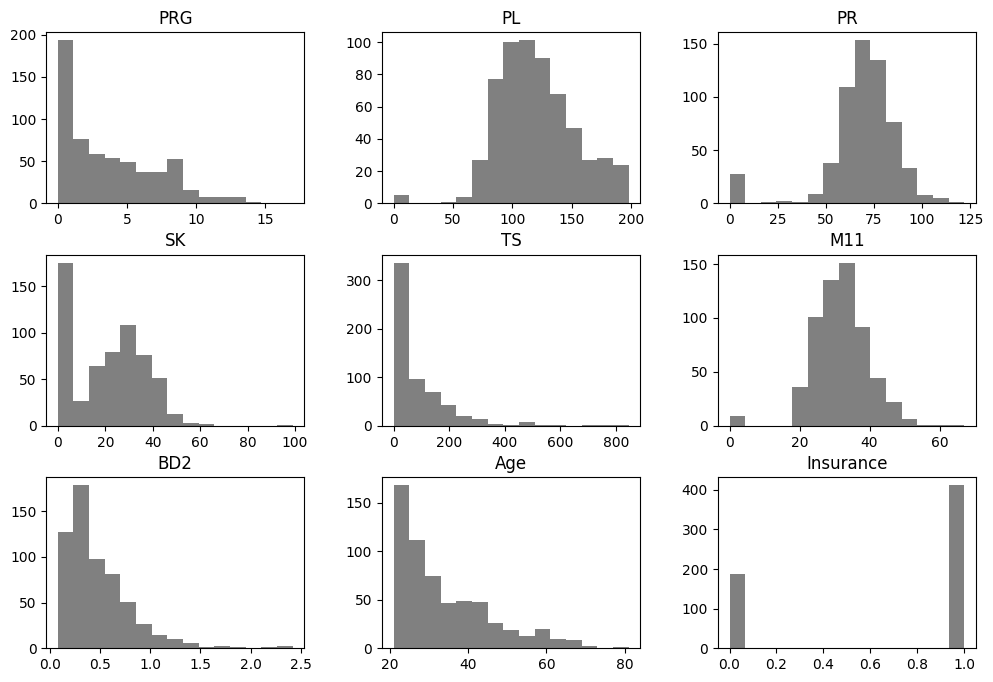

In [57]:
df.hist(figsize=(12, 8), color='grey', grid=False, bins=15)
plt.show()

In [6]:
df.duplicated().sum()

np.int64(0)

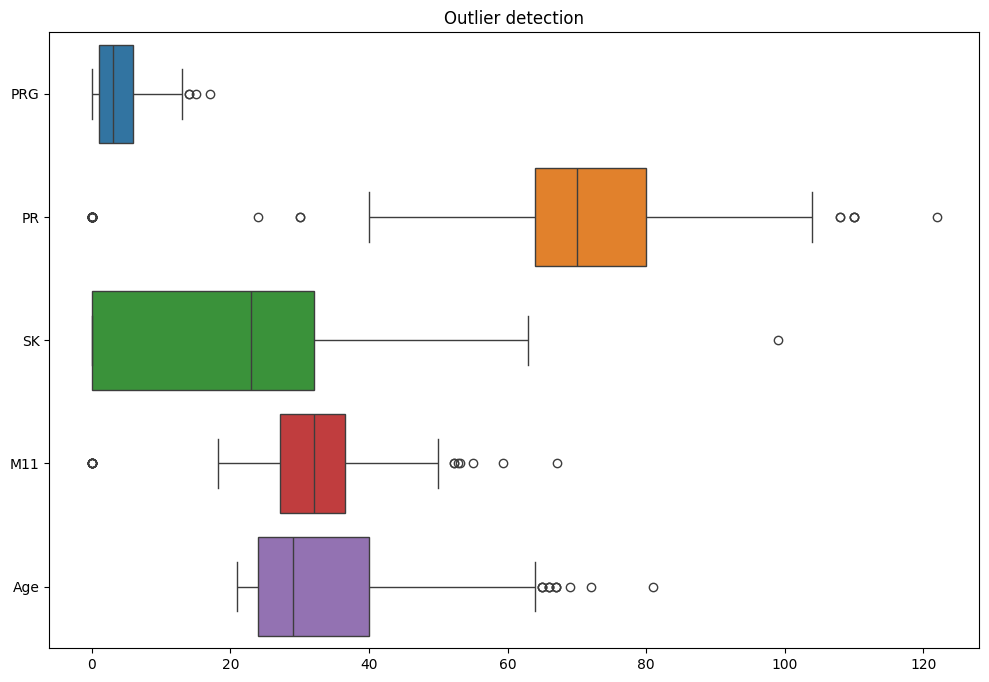

In [7]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df.drop(['ID', 'Insurance', 'Sepssis', 'TS', 'PL', 'BD2'], axis=1), orient='h')
plt.title('Outlier detection')
plt.show()

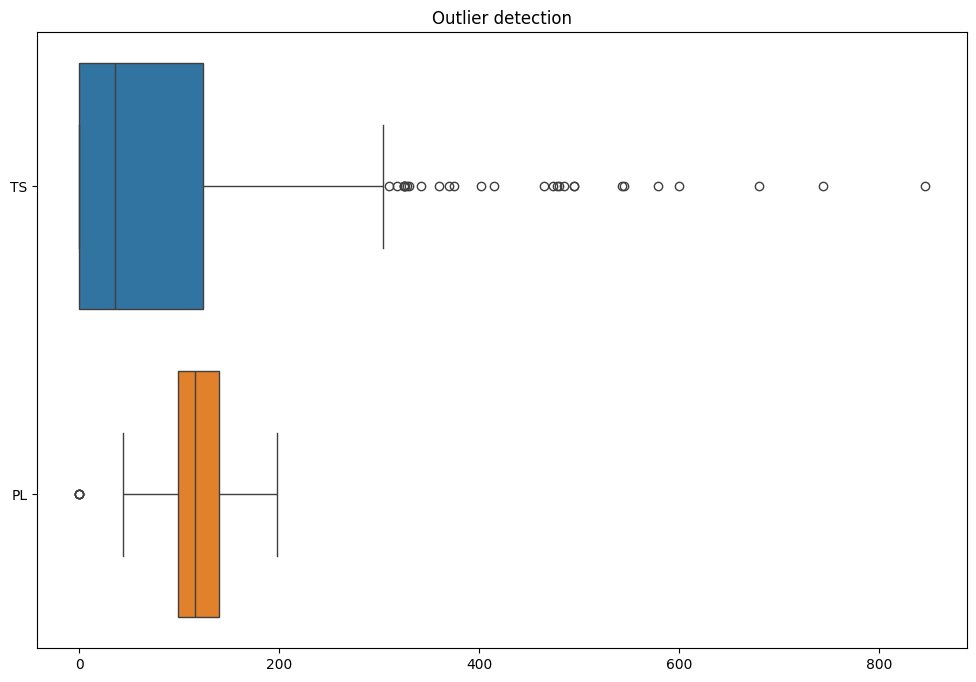

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[['TS', 'PL',]], orient='h')
plt.title('Outlier detection')
plt.show()

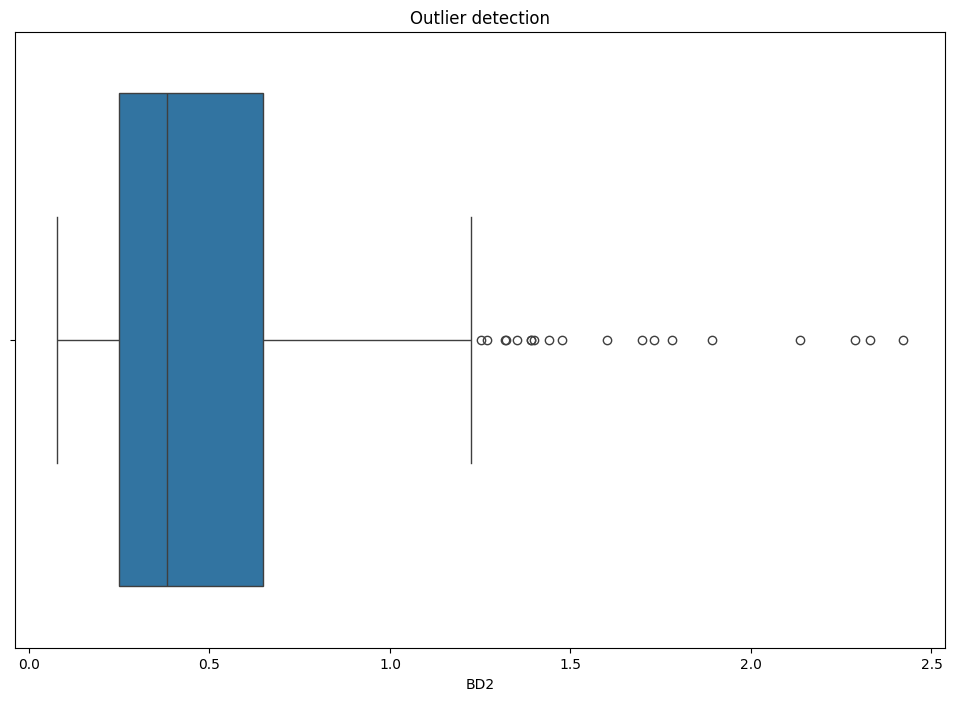

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df['BD2'], orient='h')
plt.title('Outlier detection')
plt.show()

In [58]:
numeric_columns = df.select_dtypes(include=['number'])
corr = numeric_columns.drop('Insurance', axis=1).corr()
corr

,PRG,PL,PR,SK,TS,M11,BD2,Age
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000


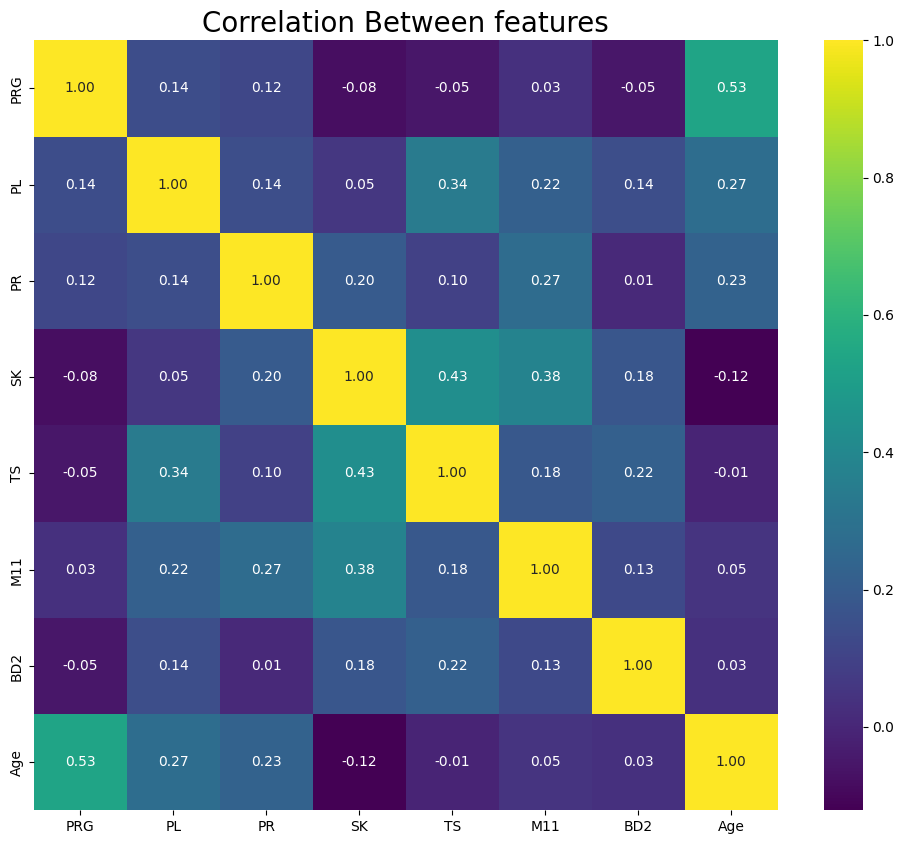

In [59]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Between features', fontsize=20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

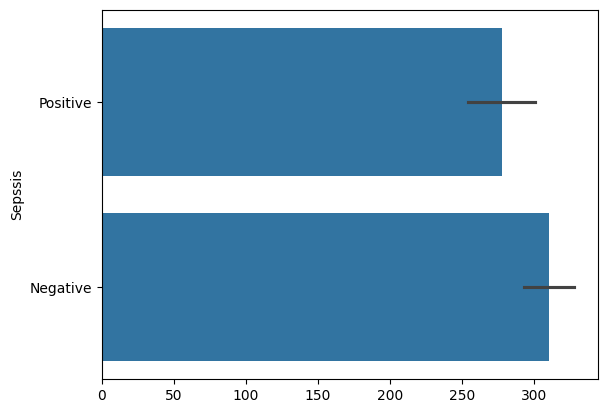

In [98]:
sns.barplot(df['Sepssis'])
plt.show

In [101]:
print(f"The percentage of patients who did not develop Sepsis is {round(df['Sepssis'].value_counts()[0]/len(df['Sepssis'])*100, 2)}%")
print(f"The percentage of patients who developed Sepsis is {round(df['Sepssis'].value_counts()[1]/len(df['Sepssis'])*100, 2)}%")

The percentage of patients who did not develop Sepsis is 65.28%
The percentage of patients who developed Sepsis is 34.72%


### Hypothesis Test

In [130]:
# Create a contingency table of age and sepsis
contingency_table = pd.crosstab(df['Age'], df['Sepssis'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05

# Print the chi-square test results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value:.9f}")
print('---------------------------------------------------------------------------------')
if p_value < alpha:
    print('We reject the null Hypothesis because Age has a significant effect on Sepsis')
else:
    print('We fail to reject the Null Hypothesis because Age has no significant effect on Sepsis')

print('---------------------------------------------------------------------------------')

Chi-square test results:
Chi-square statistic: 120.0398504698636
P-value: 0.000000068
---------------------------------------------------------------------------------
We reject the null Hypothesis because Age has a significant effect on Sepsis
---------------------------------------------------------------------------------


## Data preparation for Pipelines

In [103]:
df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative
